In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


In [6]:
df = pd.read_csv('../data/processed/student_performance_processed.csv')
df


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score,Pass_Fail,Extracurricular_Activities_Yes
0,31,68.267841,86,63,Pass,True
1,16,78.222927,73,50,Fail,False
2,21,87.525096,74,55,Fail,False
3,27,92.076483,99,65,Pass,False
4,37,98.655517,63,70,Pass,True
...,...,...,...,...,...,...
703,14,84.658761,78,50,Fail,False
704,35,60.278990,83,62,Pass,False
705,25,98.384969,75,57,Fail,False
706,21,96.148012,84,65,Pass,False


In [7]:
print(df.shape)
print(df.info())
print(df.describe())

(708, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study_Hours_per_Week            708 non-null    int64  
 1   Attendance_Rate                 708 non-null    float64
 2   Past_Exam_Scores                708 non-null    int64  
 3   Final_Exam_Score                708 non-null    int64  
 4   Pass_Fail                       708 non-null    object 
 5   Extracurricular_Activities_Yes  708 non-null    bool   
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 28.5+ KB
None
       Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
count            708.000000       708.000000        708.000000   
mean              26.132768        78.107722         77.871469   
std                8.877727        13.802802         14.402739   
min               10.000000        50.116970         50.00

# **Verification of Pre-Processing**
This is pre-processed dataset by checking for any missing values, confirming that all data types are suitable for model training, and displaying a sample of the encoded data to ensure categorical features are correctly transformed. Additionally, visualize the **correlation matrix** of all features using a heatmap to understand feature relationships.


In [9]:
print(df.isnull().sum())
print(df.info())

Study_Hours_per_Week              0
Attendance_Rate                   0
Past_Exam_Scores                  0
Final_Exam_Score                  0
Pass_Fail                         0
Extracurricular_Activities_Yes    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study_Hours_per_Week            708 non-null    int64  
 1   Attendance_Rate                 708 non-null    float64
 2   Past_Exam_Scores                708 non-null    int64  
 3   Final_Exam_Score                708 non-null    int64  
 4   Pass_Fail                       708 non-null    object 
 5   Extracurricular_Activities_Yes  708 non-null    bool   
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 28.5+ KB
None


### **Correlation Matrix for the modified Dataset**

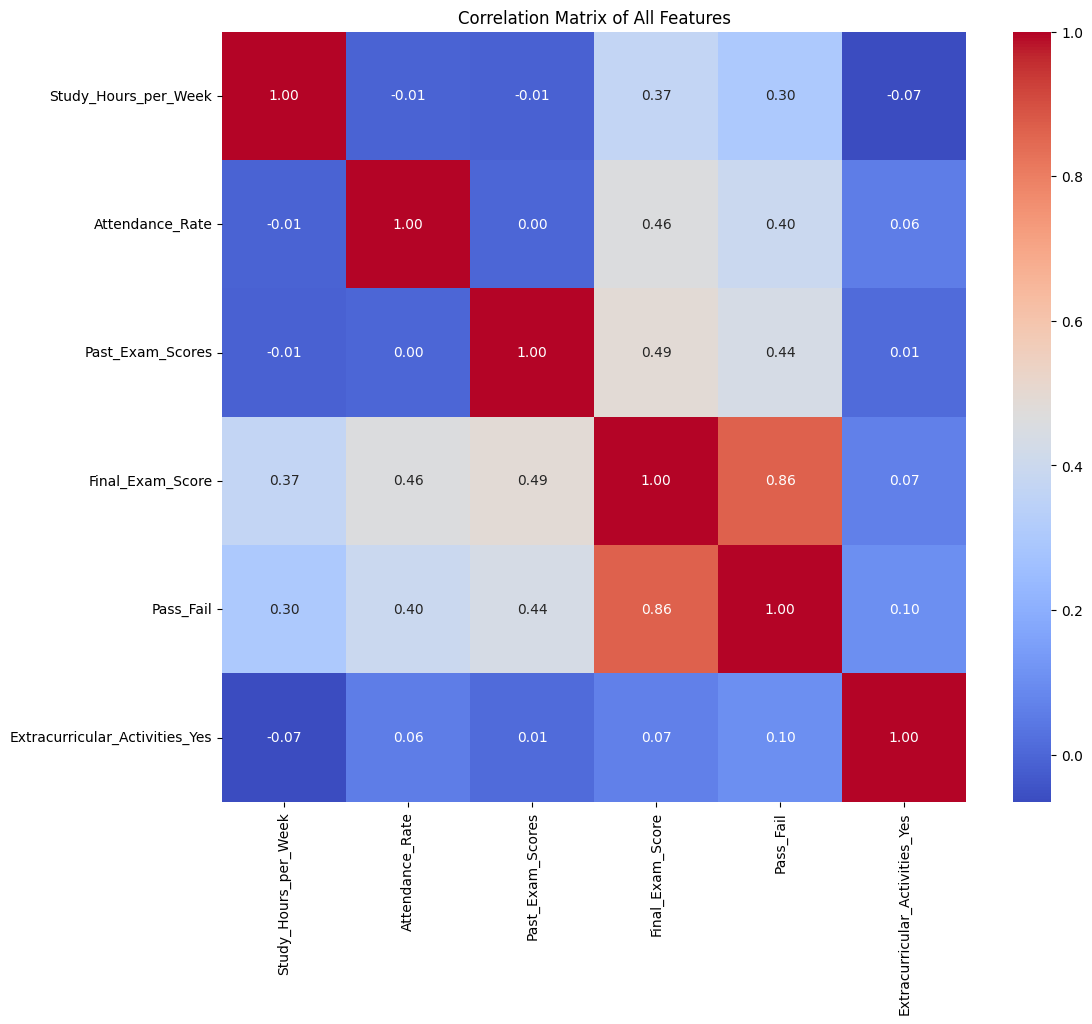

In [10]:
df['Pass_Fail'] = df['Pass_Fail'].map({'Fail': 0, 'Pass': 1})

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

In [11]:
df 

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score,Pass_Fail,Extracurricular_Activities_Yes
0,31,68.267841,86,63,1,True
1,16,78.222927,73,50,0,False
2,21,87.525096,74,55,0,False
3,27,92.076483,99,65,1,False
4,37,98.655517,63,70,1,True
...,...,...,...,...,...,...
703,14,84.658761,78,50,0,False
704,35,60.278990,83,62,1,False
705,25,98.384969,75,57,0,False
706,21,96.148012,84,65,1,False


## **Insights of Correlation matrix**:
- `Study_hours_per_week`, `Attendance_rate` and  `past_exam_scores` are partialy correlated with `Final_exam_score` and `Pass_Fai` fields
- `Pass_Fail` field is highly correlated to the `Final_Exam_score`
- [ If the correlation value is `<0` then the relation goes opposite , wich effect both the fields ]

## **Summary of Data Preparation**

After completing the pre-processing and verification steps, the dataset is now ready for model building:

1.  **Missing Values**: There are no missing values in any of the columns, ensuring data completeness.
2.  **Data Types**: All columns have appropriate data types (`int64`, `float64`, `bool`) for machine learning models. The `Pass_Fail` column has been successfully converted to numerical format (0s and 1s).
3.  **Categorical Encoding**: All categorical features (`Gender`, `Internet_Access_at_Home`, `Extracurricular_Activities`, `Parental_Education_Level`) have been correctly transformed into numerical representations using binary mapping and one-hot encoding.

### **Regression Model ( final_score regression )**

In [13]:
X_reg = df.drop(['Final_Exam_Score', 'Pass_Fail'], axis=1)
y_reg = df['Final_Exam_Score']

In [20]:

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

### **Pipeline Creating -> Feature Scaling - (Standard Scaler)**

In [39]:
reg_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

reg_model.fit(X_train_reg, y_train_reg)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [40]:
y_pred_reg = reg_model.predict(X_test_reg)

### **Model Evaluation for Final_Score Prediction**

In [41]:

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 3.058667486538796
RMSE: 3.771202972386919
R2 Score: 0.6657191642115772


In [36]:
X_reg.columns

Index(['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores',
       'Extracurricular_Activities_Yes'],
      dtype='object')

### **Field Correlation checking for better accuracy**

In [42]:
df.corr()['Final_Exam_Score'].sort_values(ascending=False)

Final_Exam_Score                  1.000000
Pass_Fail                         0.864175
Past_Exam_Scores                  0.489516
Attendance_Rate                   0.460478
Study_Hours_per_Week              0.370387
Extracurricular_Activities_Yes    0.067629
Name: Final_Exam_Score, dtype: float64

### **Classification of Pass/Fail field using Logistic Regression** 

In [45]:
X_clf = df.drop(['Pass_Fail', 'Final_Exam_Score'], axis=1)
y_clf = df['Pass_Fail']

In [46]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

### **PipeLine Creation for Classification -> (Linear Regression)**

In [48]:
tree_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier())
])
tree_clf.fit(X_train_clf, y_train_clf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])

### **Accuracy Score and Confusion Matrix of the Pass/Fail Regression Model**

Accuracy: 0.9154929577464789

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        71
           1       0.87      0.97      0.92        71

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142



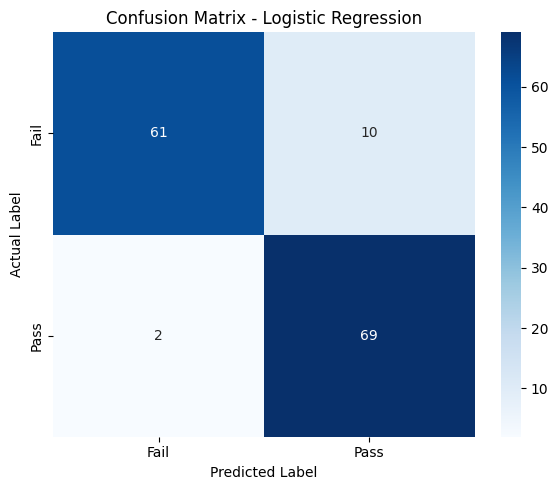

In [52]:
y_pred_clf = tree_clf.predict(X_test_clf)

print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Fail", "Pass"],
    yticklabels=["Fail", "Pass"]
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")

plt.tight_layout()
plt.show()

## **Model Creation Summary**

### **1. Linear Regression Model**
#### **Goal**: 
To predict the numeric `Final_Exam_Score` based on a student's academic and behavioral features.

#### **Key Predictors** : 
The model utilizes features such as `Study_Hours_per_Week`, `Attendance_Rate`, and `Past_Exam_Scores`, which were analyzed for their relationships via a correlation matrix.

#### **Performance**: 
This model explains approximately `65%` of the variability in student scores.

### **2. Classification Models**
#### **Model Types**: 
Logistic Regression and Decision Tree Classifier.

#### **Goal**: 
To predict categorical outcomes specifically whether a student will Pass or Fail.

#### **Performance (Logistic Regression)**:

Achieved an overall accuracy of `91.5%`.

Demonstrated balanced performance across both passing and failing categories.